In [1]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestNeighbors
import pandas as pd
import os
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.cluster import KMeans
%matplotlib inline
from sklearn.preprocessing import StandardScaler
import warnings
warnings.simplefilter('ignore')
import numpy as np


In [2]:
housing_training_data = pd.read_csv("housing_training_data.csv")
housing_training_data.head()

,house_id,price,beds,baths,square_feet,lot_size,hoa_permonth,population,pop_cat,min_temp,max_temp,temp_range
0,1,600000,0,0.0,0,2613600,0,2901,middle,32.0,90.1,58.1
1,2,175000,5,2.0,2556,69696,0,2901,middle,32.0,90.1,58.1
2,3,158800,3,2.0,1452,12196,8,2901,middle,32.0,90.1,58.1
3,4,329900,4,3.5,2550,9583,0,2901,middle,32.0,90.1,58.1
4,5,21000,2,1.0,1124,13939,0,2901,middle,32.0,90.1,58.1


In [3]:
X = housing_training_data[["temp_range", "population", "square_feet", 'price', "beds", 'baths', "lot_size", 'hoa_permonth', 
                          ]]
print(X.shape)

(4083, 8)


In [4]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
# X_train, X_test= train_test_split(X, random_state=42)

# X_train.head()

In [5]:
data = X.copy()

# data_binary_encoded = pd.get_dummies(data)
# data_binary_encoded.head()

In [6]:
from sklearn.model_selection import train_test_split

# X = pd.get_dummies(X)

X_train, X_test= train_test_split(X, random_state=42)
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


X_train.head()

,temp_range,population,square_feet,price,beds,baths,lot_size,hoa_permonth
1106,54.6,89736,2246,3749000,2,2.5,19991,0
1499,64.0,205671,2368,459000,4,2.0,5227,0
219,58.1,17163,1113,84500,3,2.0,8276,0
3196,56.8,15921,2125,524900,3,2.5,947430,0
485,54.6,1307402,979,705000,2,2.0,2879,363


In [7]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X)
# y_scaler = StandardScaler().fit(y_train)

In [8]:
X_train_scaled = X_scaler.transform(X)
# X_test_scaled = X_scaler.transform(X_test)
# # y_train_scaled = y_scaler.transform(y_train)
# # y_test_scaled = y_scaler.transform(y_test)

In [9]:
# fig1 = plt.figure(figsize=(12, 6))
# axes1 = fig1.add_subplot(1, 2, 1)
# axes2 = fig1.add_subplot(1, 2, 2)

# axes1.set_title("Original Data")
# axes2.set_title("Scaled Data")

# maxx = X_train["square_feet"].max()
# maxy = y_train.max()
# axes1.set_xlim(-maxx + 1, maxx + 1)
# axes1.set_ylim(-maxy + 1, maxy + 1)

# axes2.set_xlim(-2, 2)
# axes2.set_ylim(-2, 2)

# def set_axes(ax):
#     ax.spines['left'].set_position('center')
#     ax.spines['right'].set_color('none')
#     ax.spines['bottom'].set_position('center')
#     ax.spines['top'].set_color('none')
#     ax.xaxis.set_ticks_position('bottom')
#     ax.yaxis.set_ticks_position('left')
    
# set_axes(axes1)
# set_axes(axes2)

# axes1.scatter(X_train["size"], y_train)
# axes2.scatter(X_train_scaled[:,0], y_train_scaled[:])

In [10]:
# # Plot the results 
# from sklearn.linear_model import LinearRegression
# model = LinearRegression()
# model.fit(X_train_scaled, y_train_scaled)
# plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
# plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
# plt.legend()
# plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
# plt.title("Residual Plot")
# plt.show()

In [11]:
# from sklearn.metrics import mean_squared_error

# predictions = model.predict(X_test_scaled)
# MSE = mean_squared_error(y_test_scaled, predictions)
# r2 = model.score(X_test_scaled, y_test_scaled)

# print(f"MSE: {MSE}, R2: {r2}")

In [12]:
kmeans = KMeans(n_clusters=16)

In [13]:
kmeans.fit(X)


KMeans(n_clusters=16)

In [14]:
predicted_clusters = kmeans.predict(X)

In [15]:
X

,temp_range,population,square_feet,price,beds,baths,lot_size,hoa_permonth
0,58.1,2901,0,600000,0,0.0,2613600,0
1,58.1,2901,2556,175000,5,2.0,69696,0
2,58.1,2901,1452,158800,3,2.0,12196,8
3,58.1,2901,2550,329900,4,3.5,9583,0
4,58.1,2901,1124,21000,2,1.0,13939,0
...,...,...,...,...,...,...,...,...
4078,71.6,31078,0,119900,0,0.0,217800,0
4079,71.6,31078,1348,165000,2,2.0,0,150
4080,71.6,31078,1720,249900,4,2.5,12196,0
4081,71.6,31078,1872,219900,4,3.0,13939,0


In [16]:
Xlist = X.to_numpy()

In [17]:
Xlist

array([[5.8100e+01, 2.9010e+03, 0.0000e+00, ..., 0.0000e+00, 2.6136e+06,
        0.0000e+00],
       [5.8100e+01, 2.9010e+03, 2.5560e+03, ..., 2.0000e+00, 6.9696e+04,
        0.0000e+00],
       [5.8100e+01, 2.9010e+03, 1.4520e+03, ..., 2.0000e+00, 1.2196e+04,
        8.0000e+00],
       ...,
       [7.1600e+01, 3.1078e+04, 1.7200e+03, ..., 2.5000e+00, 1.2196e+04,
        0.0000e+00],
       [7.1600e+01, 3.1078e+04, 1.8720e+03, ..., 3.0000e+00, 1.3939e+04,
        0.0000e+00],
       [7.1600e+01, 1.4390e+04, 2.5520e+03, ..., 3.5000e+00, 0.0000e+00,
        3.0000e+02]])

### HERE BEGINS THE MAGIC

In [18]:
kmeans.fit(Xlist)

predicted_clusters = kmeans.predict(Xlist)
#TESTING INFO INPUT BLAH BLAH
# predicted_clusters = [this is where we put the array of inputed data]

In [19]:
predicted_clusters

array([13,  0,  0, ...,  0,  0,  0], dtype=int32)

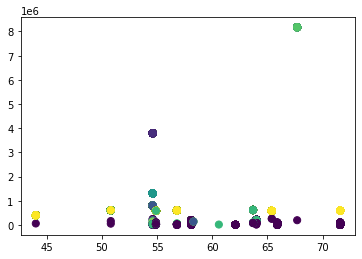

In [20]:
# Plot the clusters
plt.scatter(Xlist[:, 0], Xlist[:, 1], c=predicted_clusters, s=50, cmap='viridis')
plt.show()

In [21]:
# Print the cluster centers and cluster labels
centers = kmeans.cluster_centers_
labels = kmeans.labels_

In [22]:
centers

array([[ 6.35838454e+01,  9.91887711e+04,  1.83053518e+03,
         2.91786029e+05,  2.96828543e+00,  2.02601586e+00,
         3.50751794e+04,  3.86184341e+01],
       [ 5.46000000e+01,  3.79262100e+06,  1.65725000e+03,
         1.00917043e+06,  3.05882353e+00,  2.18566176e+00,
         3.48511691e+04,  1.91242647e+02],
       [ 5.46000000e+01,  3.79262100e+06,  3.52760714e+03,
         3.41708929e+06,  5.14285714e+00,  5.16964286e+00,
         1.63236071e+04,  3.11857143e+02],
       [ 5.89666667e+01,  4.25766300e+06,  2.34633333e+03,
         2.65000000e+07,  6.00000000e+00,  8.66666667e+00,
         1.57060000e+04,  0.00000000e+00],
       [ 5.58597436e+01,  7.07351433e+05,  2.19420513e+03,
         1.51205764e+06,  3.25384615e+00,  2.54807692e+00,
         1.19770231e+04,  3.71235897e+02],
       [ 6.77000000e+01,  8.17513300e+06, -2.27373675e-13,
         4.37275000e+06,  3.25000000e+00,  3.25000000e+00,
         1.45519152e-11,  8.52651283e-14],
       [ 6.77000000e+01,  8.175133

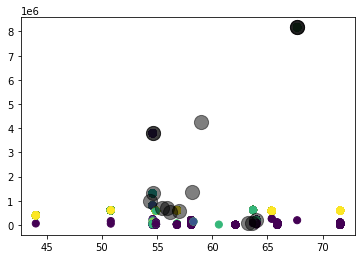

In [23]:
plt.scatter(Xlist[:, 0], Xlist[:, 1], c=labels, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

plt.show()

In [24]:
cat = kmeans.predict(Xlist[0].reshape(1, -1))

In [25]:
Xlist[0]

array([5.8100e+01, 2.9010e+03, 0.0000e+00, 6.0000e+05, 0.0000e+00,
       0.0000e+00, 2.6136e+06, 0.0000e+00])

In [26]:
Xlist[1]

array([5.8100e+01, 2.9010e+03, 2.5560e+03, 1.7500e+05, 5.0000e+00,
       2.0000e+00, 6.9696e+04, 0.0000e+00])

In [27]:
X

,temp_range,population,square_feet,price,beds,baths,lot_size,hoa_permonth
0,58.1,2901,0,600000,0,0.0,2613600,0
1,58.1,2901,2556,175000,5,2.0,69696,0
2,58.1,2901,1452,158800,3,2.0,12196,8
3,58.1,2901,2550,329900,4,3.5,9583,0
4,58.1,2901,1124,21000,2,1.0,13939,0
...,...,...,...,...,...,...,...,...
4078,71.6,31078,0,119900,0,0.0,217800,0
4079,71.6,31078,1348,165000,2,2.0,0,150
4080,71.6,31078,1720,249900,4,2.5,12196,0
4081,71.6,31078,1872,219900,4,3.0,13939,0


In [28]:
house_list = []

for i in range(4000):
    if kmeans.predict(Xlist[i].reshape(1, -1)) == cat:
        print (housing_training_data.iloc[i])
        print (housing_training_data.house_id[i])
        house_list.append(housing_training_data.house_id[i])
        print (Xlist[i])
        print (kmeans.predict(Xlist[i].reshape(1, -1)))
        
    

house_id              1
price            600000
beds                  0
baths                 0
square_feet           0
lot_size        2613600
hoa_permonth          0
population         2901
pop_cat          middle
min_temp             32
max_temp           90.1
temp_range         58.1
Name: 0, dtype: object
1
[5.8100e+01 2.9010e+03 0.0000e+00 6.0000e+05 0.0000e+00 0.0000e+00
 2.6136e+06 0.0000e+00]
[13]
house_id             13
price           3491435
beds                  0
baths                 0
square_feet           0
lot_size        4919230
hoa_permonth          0
population        30681
pop_cat          middle
min_temp             32
max_temp           90.1
temp_range         58.1
Name: 12, dtype: object
13
[5.810000e+01 3.068100e+04 0.000000e+00 3.491435e+06 0.000000e+00
 0.000000e+00 4.919230e+06 0.000000e+00]
[13]
house_id           1462
price           1200000
beds                  0
baths                 0
square_feet           0
lot_size        2613600
hoa_permonth        

In [29]:
house_list

[1, 13, 1462, 1744, 1780, 2149, 2173, 2199, 2723, 3847]

In [30]:
# now we go back to the orginal dataframe and find these house_ids
# df.loc[df['column_name'] == some_value]
find_it = housing_training_data.loc[housing_training_data['house_id'] == 1]

In [31]:
find_it

,house_id,price,beds,baths,square_feet,lot_size,hoa_permonth,population,pop_cat,min_temp,max_temp,temp_range
0,1,600000,0,0.0,0,2613600,0,2901,middle,32.0,90.1,58.1


In [39]:
print(f'{find_it.house_id} and {find_it.price}'" in the US.")

0    1
Name: house_id, dtype: int64 and 0    600000
Name: price, dtype: int64 in the US.


In [35]:
# for row in housing_training_data.itertuples():
# #     if (housing_training_data.house_id == "1"):
#     print(row)